<a href="https://colab.research.google.com/github/SandumiJay/computer-Vision-car-or-truck/blob/main/car_or_truck_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# from google.colab import files

# files.upload()

In [7]:
#Kaggel connetion initiation

# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d ryanholbrook/car-or-truck


In [8]:
#unzip dataset
# !unzip -j car-or-truck.zip -d car_or_truck

In [1]:
# Imports libraries
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [3]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [11]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '/Users/sandumi/Documents/kaggle/datasets/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/Users/sandumi/Documents/kaggle/datasets/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [12]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [8]:
pretrained_base = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
pretrained_base.trainable = False

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=1,
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 541s 7s/step - binary_accuracy: 0.5785 - loss: 0.6772 - val_binary_accuracy: 0.5785 - val_loss: 0.6762
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 538s 7s/step - binary_accuracy: 0.5785 - loss: 0.6762 - val_binary_accuracy: 0.5785 - val_loss: 0.6751
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 525s 7s/step - binary_accuracy: 0.5785 - loss: 0.6752 - val_binary_accuracy: 0.5785 - val_loss: 0.6740
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 526s 7s/step - binary_accuracy: 0.5785 - loss: 0.6741 - val_binary_accuracy: 0.5785 - val_loss: 0.6727
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 526s 7s/step - binary_accuracy: 0.5785 - loss: 0.6730 - val_binary_accuracy: 0.5785 - val_loss: 0.6713
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 526s 7s/step - binary_accuracy: 0.5785 - loss: 0.6717 - val_binary_accuracy: 0.5785 - val_loss: 0.6698
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 526s 7s/step - binary_accuracy: 0.5785 - loss: 0.6703 - val_binary_accuracy: 0.5785 - val_loss: 0.6681
Epoch 8/30
80

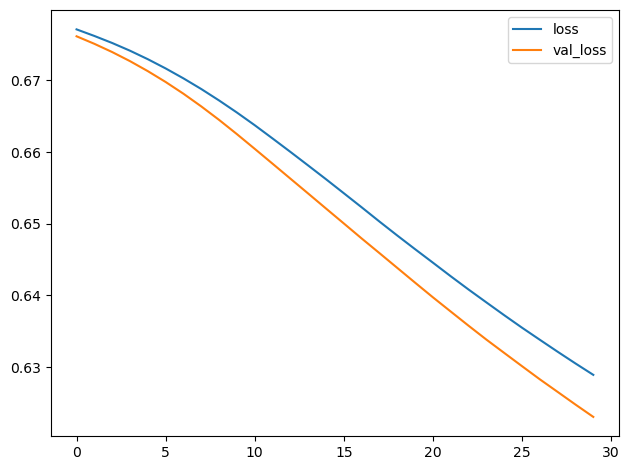

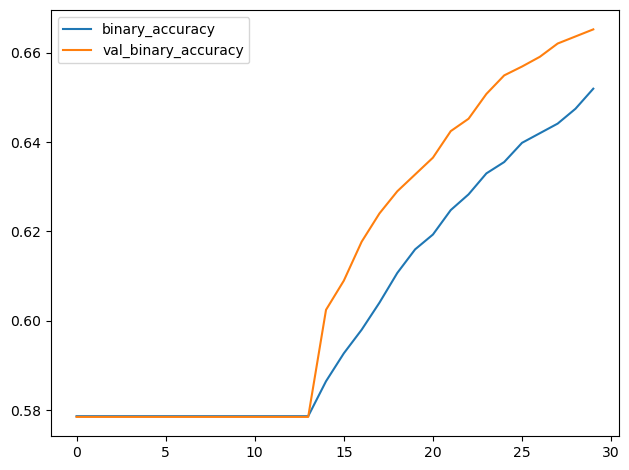

In [19]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();